In [78]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [79]:

data = pd.read_excel('./data/sample_superstore.xls')


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [81]:

data.head().T

,0,1,2,3,4
Row ID,1,2,3,4,5
Order ID,CA-2016-152156,CA-2016-152156,CA-2016-138688,US-2015-108966,US-2015-108966
Order Date,2016-11-08 00:00:00,2016-11-08 00:00:00,2016-06-12 00:00:00,2015-10-11 00:00:00,2015-10-11 00:00:00
Ship Date,2016-11-11 00:00:00,2016-11-11 00:00:00,2016-06-16 00:00:00,2015-10-18 00:00:00,2015-10-18 00:00:00
Ship Mode,Second Class,Second Class,Second Class,Standard Class,Standard Class
Customer ID,CG-12520,CG-12520,DV-13045,SO-20335,SO-20335
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff,Sean O'Donnell,Sean O'Donnell
Segment,Consumer,Consumer,Corporate,Consumer,Consumer
Country,United States,United States,United States,United States,United States
City,Henderson,Henderson,Los Angeles,Fort Lauderdale,Fort Lauderdale


In [82]:
data['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Avery 5                                                                                 1
Bush Birmingham Collection Bookcase, Dark Cherry                                        1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Cisco SPA 501G IP Phone                                                                 1
Xerox 1918                                                                              1
Name: Prod

In [83]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [84]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [85]:
data['State'].value_counts()#.shape

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [86]:

data_furniture = data[data['Category'] == 'Furniture']

In [87]:
data_furniture.shape

(2121, 21)

In [88]:
print("Data mais antiga: ",data_furniture['Order Date'].min())
print("Data mais recente: ", data_furniture['Order Date'].max())

Data mais antiga:  2014-01-06 00:00:00
Data mais recente:  2017-12-30 00:00:00


In [89]:
data_furniture.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

In [90]:
use_columns = np.array(['Order Date', 'Sales'])

In [91]:
data_furniture = data_furniture[use_columns]

In [92]:
data_furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  2121 non-null   datetime64[ns]
 1   Sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.7 KB


In [93]:
data_furniture = data_furniture.sort_values('Order Date')

In [94]:
data_furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [95]:
data_furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [96]:
data_furniture['Order Date'][:5]

7474   2014-01-06
7660   2014-01-07
866    2014-01-10
716    2014-01-11
2978   2014-01-13
Name: Order Date, dtype: datetime64[ns]

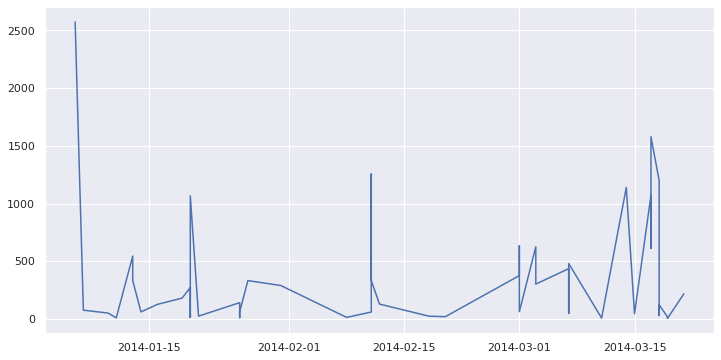

In [97]:

fig, axe = plt.subplots(figsize=(12,6))
axe.plot(data_furniture['Order Date'][:50], data_furniture['Sales'][:50])

In [101]:
data_furniture['Order Date'].value_counts()

2016-09-05    10
2017-10-30     9
2016-12-25     9
2017-11-19     9
2016-12-01     9
              ..
2017-04-15     1
2015-07-24     1
2014-04-19     1
2016-07-21     1
2016-01-23     1
Name: Order Date, Length: 889, dtype: int64

In [106]:
#k = data_furniture.groupby('Order Date')['Sales'].sum(); k

In [108]:
data_furniture = data_furniture.groupby('Order Date')['Sales'].sum().reset_index(); data_furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [68]:
data_furniture = data_furniture.set_index('Order Date')
data_furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [69]:
y = data_furniture['Sales'].resample('MS').mean()

In [72]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

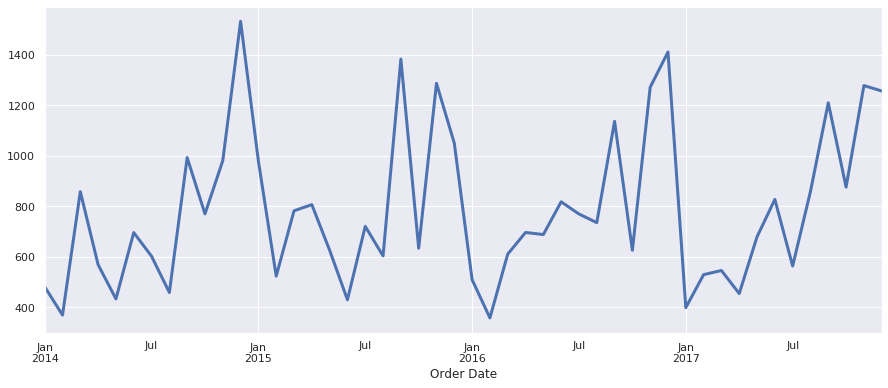

In [75]:
y.plot(figsize=(15,6), lw=3)
plt.show()